In [1]:
import pandas as pd
import numpy as np

raw = pd.read_csv("boston.txt", sep=r"\s+", skiprows=22, header=None)
X = np.hstack([raw.values[::2, :], raw.values[1::2, :2]])
y = raw.values[1::2, 2]
columns = [ "crim", "zn", "indus", "chas", "nox", "rm", "age",
"dis", "rad", "tax", "ptratio", "b", "lstat"]
df = pd.DataFrame(X, columns=columns)
df["medv"] = y

## a

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     323.4
Date:                Fri, 13 Feb 2026   Prob (F-statistic):           4.93e-91
Time:                        10:14:26   Log-Likelihood:                -1631.1
No. Observations:                 506   AIC:                             3268.
Df Residuals:                     503   BIC:                             3281.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.0941      0.561     60.809      0.0

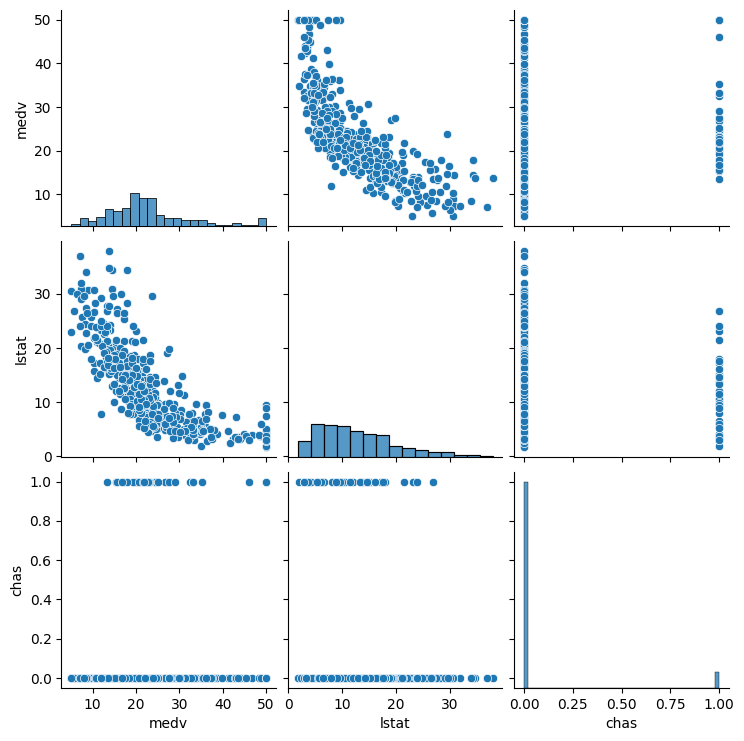

In [2]:
import matplotlib.pyplot as plt
from seaborn import pairplot
import statsmodels.api as sm

pairplot(df[["medv", "lstat", "chas"]])
X = sm.add_constant(df[["lstat", "chas"]])
model = sm.OLS(df["medv"], X).fit()
print(model.summary())

The pair plots indicate a non linear relationship between `lstat` and `medv`, `medv` drops quickly for low-mid `lstat`, and then flattens out. Usually taking the log, square root, or inverse of `lstat` can help fix this. For this problem, we will use a log transformation.  

**Intercept**: 34.0941, SE 0.561, p < 0.0001  
This is the predicted `medv` for an `lstat` and `chas` value of 0. This isn't meaningful realistically as `lstat` 0 isn't possible, but this anchors the regression line. The value is statistically significant and well estimated from the low SE and p value.

**`lstat` coefficient**: -0.9406, SE 0.038, p < 0.0001  
Holding `chas` constant, a 1 percentage point increase in `lstat` is attributed to about a $940.6 decrease in `medv`. The value is statistically significant and well estimated from the low SE and p value.

**`chas` coefficient**: 4.92, SE 1.069, p < 0.0001
Holding `lstat` constant, properties that border the Charles River are attributed to a $4,920 increase in `medv`. The value is statistically significant and well estimated from the low SE and p value.

In [3]:
# log lstat for model instead, keep chas as is
df["log_lstat"] = np.log(df["lstat"])
X = sm.add_constant(df[["log_lstat", "chas"]])
model = sm.OLS(df["medv"], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     530.1
Date:                Fri, 13 Feb 2026   Prob (F-statistic):          1.43e-124
Time:                        10:15:28   Log-Likelihood:                -1553.4
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     503   BIC:                             3125.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.5250      0.956     53.899      0.0

## b

In [4]:
df["loglstat_chas"] = df["log_lstat"] * df["chas"]
X = sm.add_constant(df[["log_lstat", "chas", "loglstat_chas"]])
model_interaction = sm.OLS(df["medv"], X).fit()
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     354.8
Date:                Fri, 13 Feb 2026   Prob (F-statistic):          1.35e-123
Time:                        10:16:12   Log-Likelihood:                -1552.4
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     502   BIC:                             3130.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            51.0995      1.000     51.075

**Intercept**: 33.7672, SE 0.570, p < 0.0001  
This is the predicted `medv` for an `lstat` and `chas` value of 0. This isn't meaningful realistically as `lstat` 0 isn't possible, but this anchors the regression line. The value is statistically significant and well estimated from the low SE and p value.

**`lstat` coefficient**: -0.9150, SE 0.039, p < 0.0001  
Holding `chas` constant, a 1 percentage point increase in `lstat` is attributed to about a $915 decrease in `medv`. The value is statistically significant and well estimated from the low SE and p value. The coefficient is slightly smaller than the model without the interaction term.

**`chas` coefficient**: 9.8251, SE 2.103, p < 0.0001
Holding `lstat` constant, properties that border the Charles River are attributed to a $9,825.10 increase in `medv`. The value is statistically significant and well estimated from the low SE and p value. The coefficient is significantly larger than the model without the interaction term.

**`lstat:chas` coefficient**: -0.4329, SE 0.160, p 0.007  
The negative effect of `lstat` is stronger for properties bordering the Charles River. The value is statistically significant and well estimated from the low SE and p value. Specifically, for properties that border the Charles River, a 1 percentage point increase in `lstat` decreased `medv` by $1,347.90 compared to the $915 elsewhere.

Given that the new R squared value of this model (0.569, 0.566) is barely an improvement from the previous model (0.563, 0.561), interactions do not improve the model, but the term is real and statistically meaningful.

## c

In [5]:
df0 = df[df["chas"] == 0]
df1 = df[df["chas"] == 1]

X0 = sm.add_constant(df0["log_lstat"])
model0 = sm.OLS(df0["medv"], X0).fit()
print(model0.summary())

X1 = sm.add_constant(df1["log_lstat"])
model1 = sm.OLS(df1["medv"], X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     925.6
Date:                Fri, 13 Feb 2026   Prob (F-statistic):          4.68e-113
Time:                        10:16:35   Log-Likelihood:                -1437.2
No. Observations:                 471   AIC:                             2878.
Df Residuals:                     469   BIC:                             2887.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.0995      0.982     52.025      0.0

| Model | n | R^2 | Adj R^2 | AIC | BIC |
|-------|---|-----|---------|-----|-----|
| Interaction | 506 | 0.569 | 0.566 | 3263 | 3281 |
| `chas` = 0 | 471 | 0.552 | 0.551 | 3014 | 3022 |
| `chas` = 1 | 35 | 0.582 | 0.569 | 244.7 | 247.8 |

Note that the slopes for each `chas` specific model are the same as the indicated slopes in the interaction model when accounting for the interaction term. Additionally, the `chas` = 1 model only has 35 samples. Thus, we prefer the interaction model due to it using all 506 observations, and provides a direct statistical test for slope differences in the `chas` specific models with better estimates. The comparison given by the model is straighforward and captures the majority of the information given by both groups.

## d

In [6]:
df_restrict = df[df["rad"] <= 8]

X_num = sm.add_constant(df_restrict[["log_lstat", "rad"]].astype(float))
model_num = sm.OLS(df_restrict["medv"].astype(float), X_num).fit()
print(model_num.summary())

rad_dummies = pd.get_dummies(df_restrict["rad"], prefix="rad")
X_cat = sm.add_constant(pd.concat([df_restrict["log_lstat"].astype(float), rad_dummies.astype(float)], axis=1))
model_cat = sm.OLS(df_restrict["medv"].astype(float), X_cat).fit()
print(model_cat.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     284.8
Date:                Fri, 13 Feb 2026   Prob (F-statistic):           1.12e-75
Time:                        10:16:53   Log-Likelihood:                -1153.1
No. Observations:                 374   AIC:                             2312.
Df Residuals:                     371   BIC:                             2324.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.4863      1.337     36.263      0.0

| Model | n | R^2 | Adj R^2 | AIC | BIC |
|-------|---|-----|---------|-----|-----|
| Numerical `rad` | 374 | 0.458 | 0.455 | 2431 | 2443 |
| Categorical `rad` | 374 | 0.500 | 0.489 | 2413 | 2448 |

Using `rad` as categorical significantly improves R^2 by 0.4. The AIC strongly favors the categorical specification, as the delta of 18 shows that allowing non-linear, level-specific effects of rad improves the fit. BIC slightly favors numerical specification however, as rad is heavily penalized with extra parameters as a categorical variable. Looking at the coefficients, the numerical rad value is barely statistically significant with a p-value of 0.054. However for the categorical model, different rads have varying statistical significance levels. This matches how rad is constructed realistically as it is an index, not a continuous economic quantity. Thus overall, we prefer the categorical specification due to higher adjusted R^2 and better representation of the predictor variables.

## e

In [7]:
b3 = model_cat.params["rad_3.0"]
b4 = model_cat.params["rad_4.0"]
diff = b3 - b4
print(f"Estimated difference in expected value of medv between houses w/ rad = 3 and rad = 4: {diff}")

cov = model_cat.cov_params()
var_diff = (
    cov.loc["rad_3.0", "rad_3.0"]
    + cov.loc["rad_4.0", "rad_4.0"]
    - 2 * cov.loc["rad_3.0", "rad_4.0"]
)
se_diff = np.sqrt(var_diff)
print(f"Estimated standard error of the difference: {se_diff}")

Estimated difference in expected value of medv between houses w/ rad = 3 and rad = 4: 3.0640954476181066
Estimated standard error of the difference: 0.9816951849191523
